In [836]:
#Import all the given datasets and explore shape and size of each.
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

In [837]:
#import first data set
df1 = pd.read_csv('TelcomCustomer-Churn.csv')
df1.shape

(7043, 21)

In [838]:
#import second data set
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
df2.shape


(7043, 11)

In [839]:
#import third data set
df3 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df3.shape

(7043, 10)

In [840]:
#Merge the DataFrames
df_merged = pd.merge(df1, df2, how='inner', left_index=True, right_index=True, suffixes=('', '_drop'))

#Drop the duplicate columns
df_merged.drop([col for col in df_merged.columns if 'drop' in col], axis=1, inplace=True)
df_merged


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [841]:
#Merge all datasets onto one and explore final shape and size.
df_merged1 = pd.merge(df_merged, df3, how='inner', left_index=True, right_index=True, suffixes=('', '_drop'))
df_merged1.drop([col for col in df_merged1.columns if 'drop' in col], axis=1, inplace=True)
df_merged1.shape
df_merged1.to_csv('df_merged1.csv', index=False)

In [842]:

%%writefile datacleaningtest.py

#Automate all the datacleaning steps
import numpy as np
import pandas as pd

#Drop the null values.
df_merged1  = pd.read_csv('df_merged1.csv')
df4 = df_merged1.dropna() 
#datafra3['LoanOnCard'] = datafra3['LoanOnCard'].replace(' , np.nan)
#datafra4 = datafra3.fillna(datafra3.mean())
df4.shape

df4.isnull().sum()

#Drop the null values.
df4 = df_merged1.dropna() 
#datafra3['LoanOnCard'] = datafra3['LoanOnCard'].replace(' , np.nan)
#datafra4 = datafra3.fillna(datafra3.mean())
df4.shape

df4.info()

df4['TotalCharges'] = pd.to_numeric(df4['TotalCharges'],errors='coerce')

for feature in df4[['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]: # Loop through all columns in the dataframe
    if df4[feature].dtype == 'object': # Only apply for columns with categorical strings
        df4[feature] = pd.Categorical(df4[feature])# Replace strings with an integer
df4.head(10)

df4.info

df4 = df4.fillna(df4.median())

df4.isnull().sum()

print(df4.gender.value_counts())
print(df4.Partner.value_counts())
print(df4.Dependents.value_counts())
print(df4.PhoneService.value_counts())
print(df4.MultipleLines.value_counts())
print(df4.InternetService.value_counts())
print(df4.DeviceProtection.value_counts())
print(df4.TechSupport.value_counts())
print(df4.StreamingTV.value_counts())
print(df4.StreamingMovies.value_counts())
print(df4.Contract.value_counts())
print(df4.PaperlessBilling.value_counts())
print(df4.Churn.value_counts())
print(df4.PaymentMethod.value_counts())
print(df4.OnlineSecurity.value_counts())
print(df4.OnlineBackup.value_counts())

replaceStruct = {
                "gender": {"Male": 1, "Female": 2},
                "Partner": {"No": 1, "Yes":2 },
                "Dependents": {"No": 1, "Yes":2 },
                "PhoneService":{"No": 1, "Yes": 2 } ,
                "MultipleLines":{"No": 1, "Yes": 2 , "No phone service": 3} ,
                "InternetService":{"Fiber optic": 1, "DSL": 2 , "No": 3} ,
                "DeviceProtection": {"No": 1, "Yes":2 ,"No internet service":3},
                "TechSupport":{"No": 1, "Yes": 2 , "No internet service": 3} ,
                "StreamingTV":{"No": 1, "Yes": 2 , "No internet service": 3} , 
                "StreamingMovies":{"No": 1, "Yes": 2 , "No internet service": 3} ,
                "OnlineBackup":{"No": 1, "Yes": 2 , "No internet service": 3} ,
                "Contract":{"Month-to-month": 1 , "One year": 2 , "Two year": 3} ,
                "PaperlessBilling":{"No": 1, "Yes": 2 } ,
                "Churn":{"No": 1, "Yes": 2 } ,
                "PaymentMethod":{"Electronic check": 1, "Mailed check": 2 ,"Bank transfer (automatic)": 3,"Credit card (automatic)": 4},
                "OnlineSecurity":{"No": 1, "Yes": 2 , "No internet service": 3} ,
                    }

df4=df4.replace(replaceStruct)
#df4=pd.get_dummies(df4, columns=oneHotCols)
df4.head(10)

df4.info()

df4.to_csv('df4.csv', index=False)

Overwriting datacleaningtest.py


In [843]:
!python  datacleaningtest.py

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [844]:
#Data analysis & visualisation
#Descriptive statistics of each & every column using describe() function
df4  = pd.read_csv('df4.csv')
df4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,1.495244,0.500013,1.00,1.000,1.000,2.00,2.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
Partner,7043.0,1.483033,0.499748,1.00,1.000,1.000,2.00,2.00
Dependents,7043.0,1.299588,0.458110,1.00,1.000,1.000,2.00,2.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
PhoneService,7043.0,1.903166,0.295752,1.00,2.000,2.000,2.00,2.00
MultipleLines,7043.0,1.615505,0.656039,1.00,1.000,2.000,2.00,3.00
InternetService,7043.0,1.777084,0.778877,1.00,1.000,2.000,2.00,3.00
OnlineSecurity,7043.0,1.720006,0.796885,1.00,1.000,2.000,2.00,3.00
OnlineBackup,7043.0,1.778220,0.778472,1.00,1.000,2.000,2.00,3.00


<AxesSubplot:xlabel='Churn', ylabel='count'>

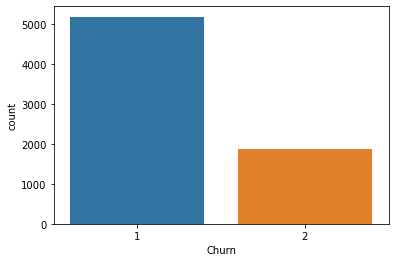

In [845]:
#univariate analysis
sns.countplot(df4['Churn'])

<AxesSubplot:xlabel='Churn', ylabel='Density'>

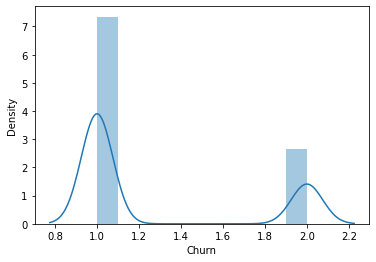

In [846]:
sns.distplot(df4['Churn'])

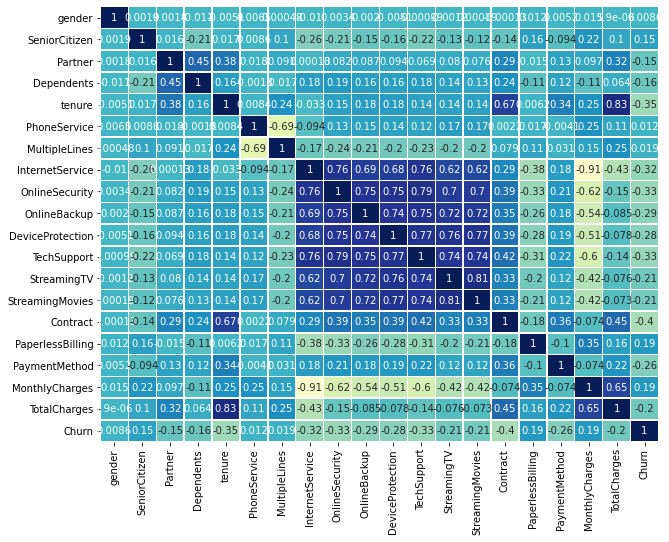

In [847]:
plt.figure(figsize=(10,8))
sns.heatmap(df4.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()
#Each square shows the correlation between the variables on each axis. 
#Correlation ranges from -1 to +1. 
#Values closer to zero means there is no linear trend between the two variables.
#The close to 1 the correlation is the more positively correlated they are;
#that is as one increases so does the other and the closer to 1 the stronger this relationship

In [848]:
#levels of Churn variable
df4['Churn'].value_counts()

1    5174
2    1869
Name: Churn, dtype: int64

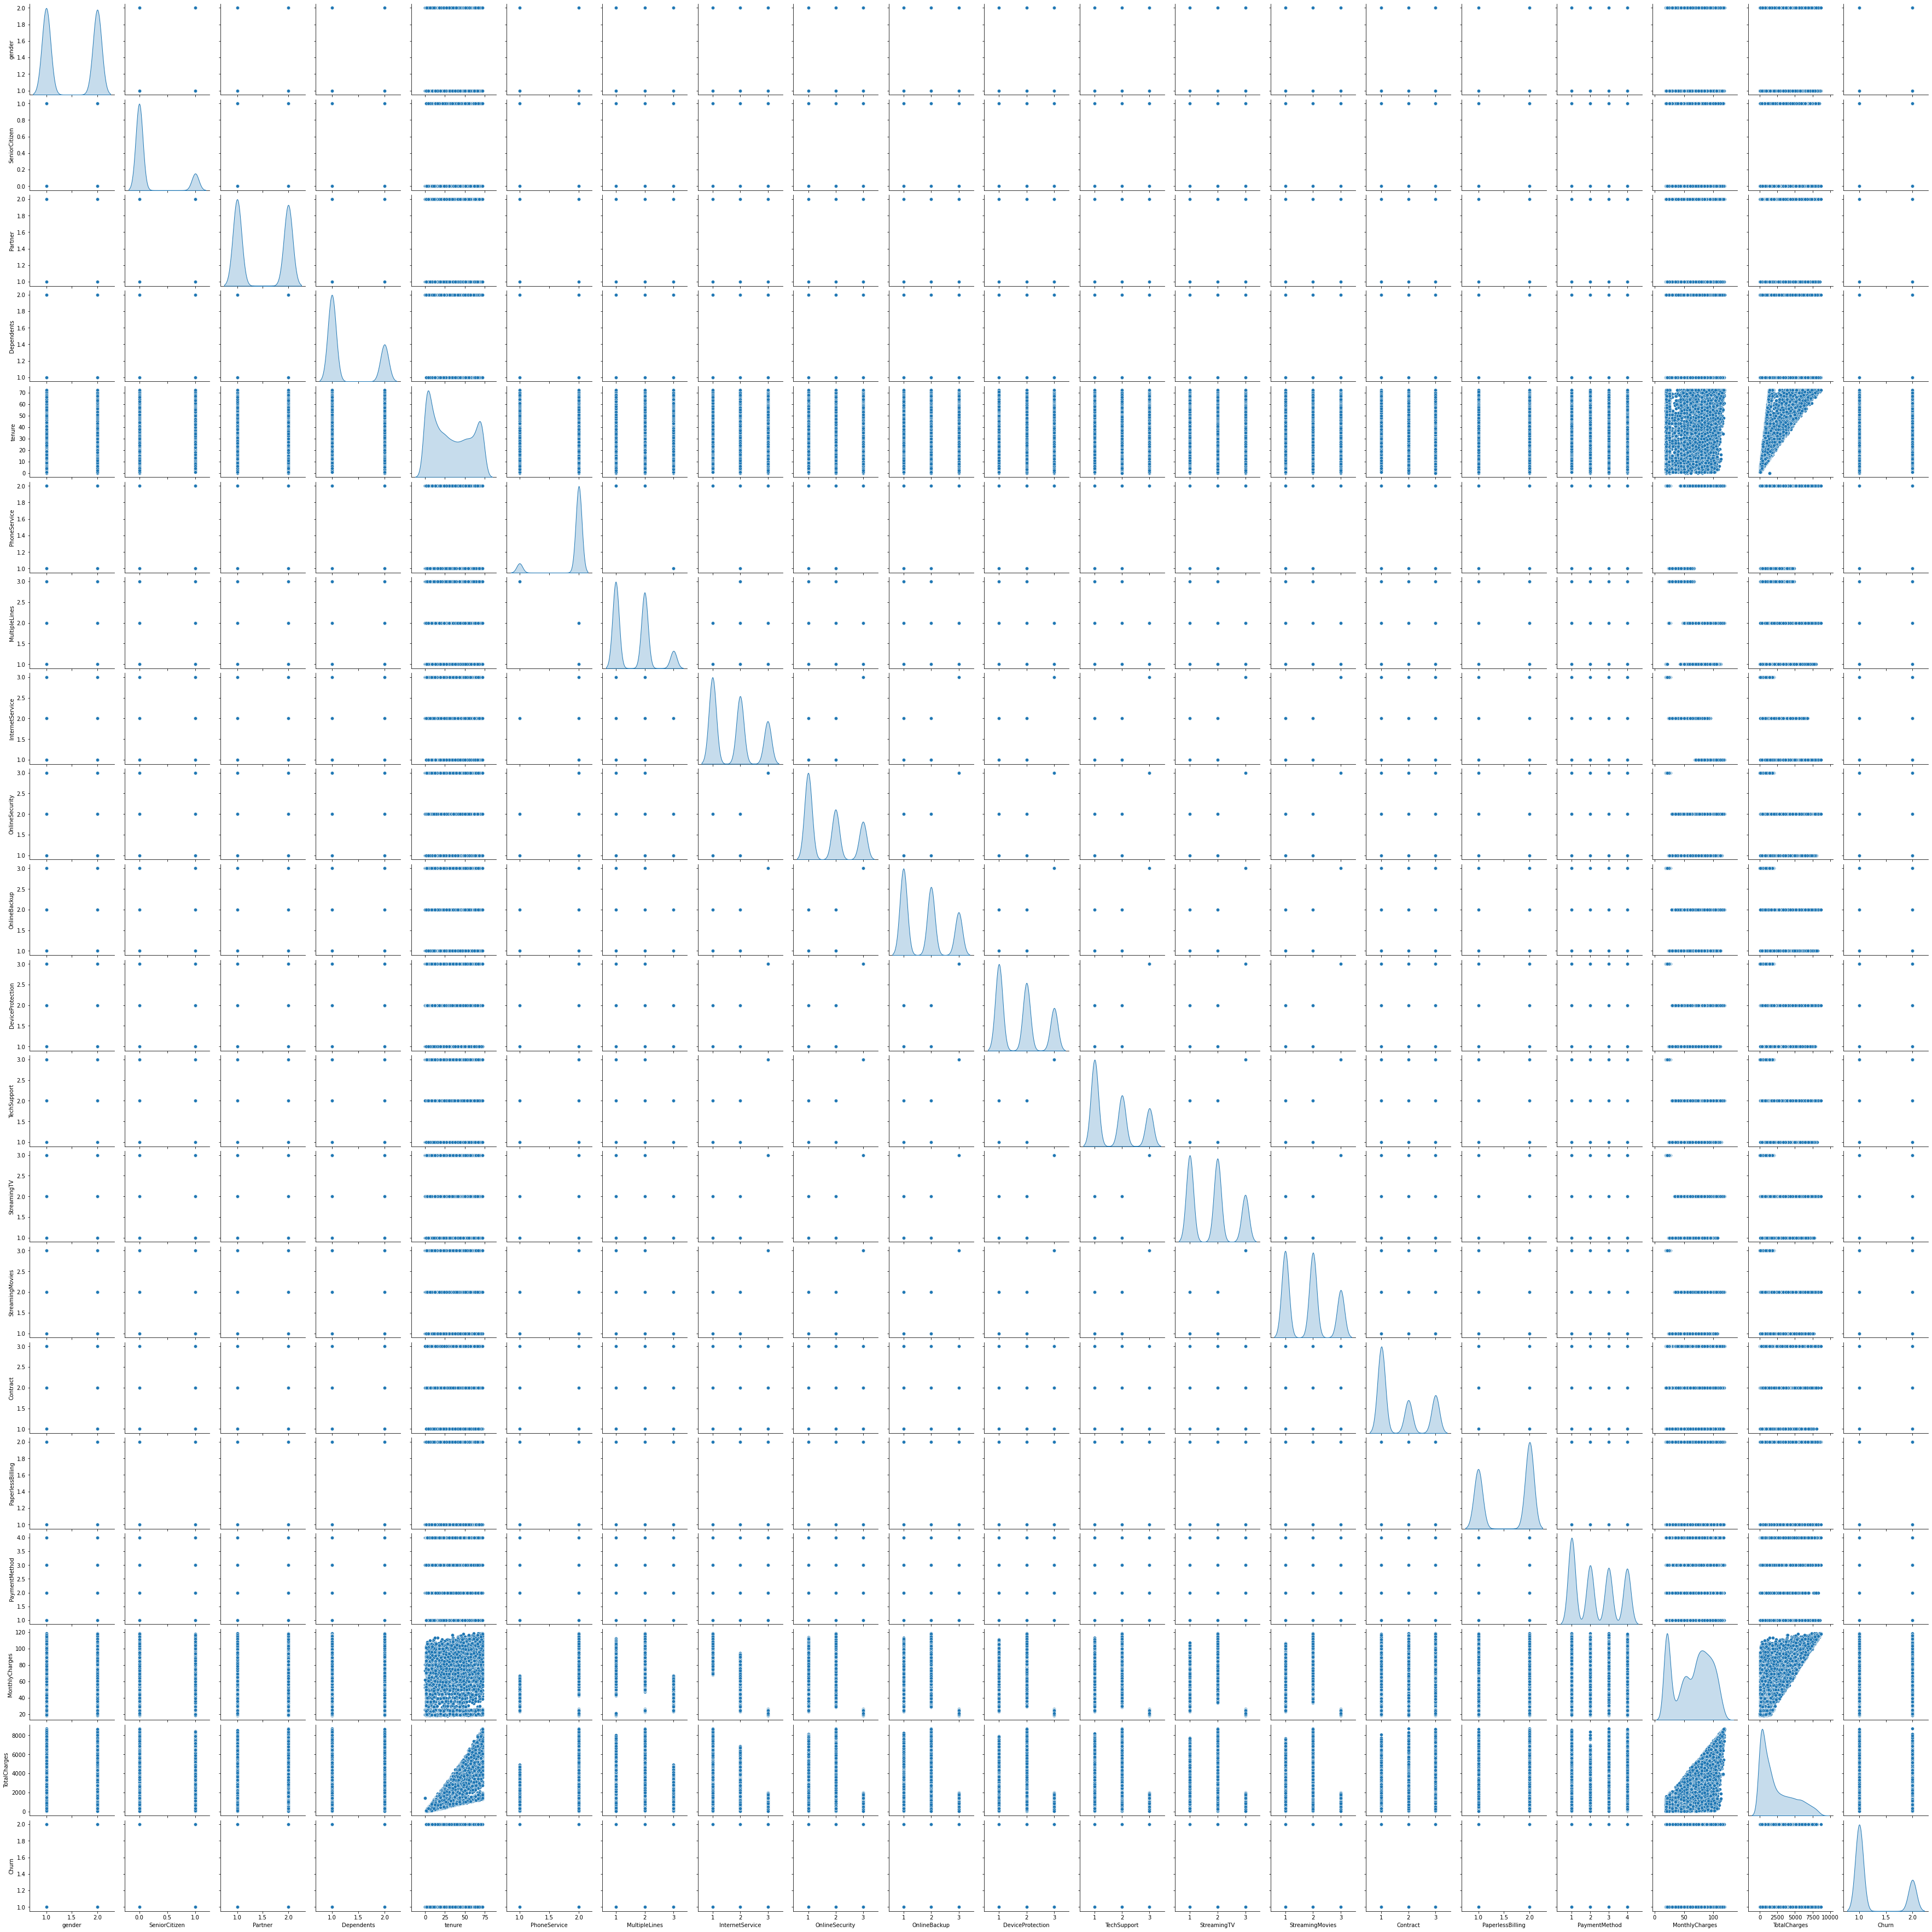

In [849]:
#Multivariate analysis
sns.pairplot(df4, diag_kind = 'kde')

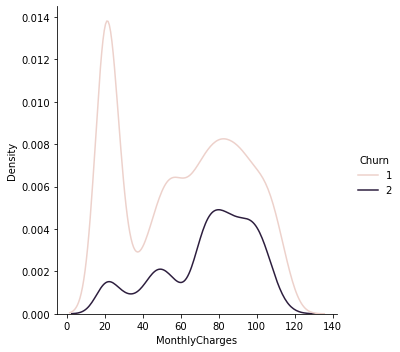

In [850]:
#biviariate analysis
sns.displot(data=df4, x="MonthlyCharges", hue=df4['Churn'], kind="kde")
#Monthly charges with Churn= No  is greater than that of Churn = Yes

In [851]:

#Data pre-processing
#Segregate predictors vs target attributes
X = df4.drop(['customerID','Churn'] , axis=1)

y = df4['Churn']


In [852]:
#Perform train-test split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.25,
                                                   random_state=22)
X_train.shape,X_test.shape

((5282, 19), (1761, 19))

In [853]:
#Model training, testing and tuning:
#Train and test all ensemble models taught in the learning module.
#Apply all the possible tuning techniques to train the best model for the given data.
#Display and compare all the models designed with their train and test accuracies.
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [854]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [855]:
##Display the classification accuracies for train and test data

print('Training Data Accuracy' ,model_entropy.score(X_train, y_train))

Training Data Accuracy 0.9977281332828474


In [856]:
print('Testing Data Accuracy' ,model_entropy.score(X_test, y_test))


Testing Data Accuracy 0.7257240204429302


In [857]:
#Display the classification accuracies for train and test data.
#Apply all the possible tuning techniques to train the best model for the given data.
#DecisionTreeClassifier
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 22,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=22)

In [858]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [859]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.7575241340147644
0.7836046951912155


In [860]:
acc_DT = accuracy_score(y_test, preds_pruned)

In [861]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.757524


In [862]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [863]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [864]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.757524
0,Random Forest,0.781942


In [865]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [866]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [867]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.757524
0,Random Forest,0.781942
0,Adaboost,0.783646


In [868]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100, max_samples= .5, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [869]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [870]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.757524
0,Random Forest,0.781942
0,Adaboost,0.783646
0,Bagging,0.784214


In [871]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.2, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [872]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [873]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.757524
0,Random Forest,0.781942
0,Adaboost,0.783646
0,Bagging,0.784214
0,Gradient Boost,0.785349


In [874]:
#StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

from warnings import filterwarnings
filterwarnings('ignore')

def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression(max_iter = 100)
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

	# define the stacking ensemble


model = get_stacking()
model = model.fit(X_train, y_train)

In [875]:
pred_stk =model.predict(X_test)
acc_stk = accuracy_score(y_test, pred_stk)

In [876]:
tempResultsDf = pd.DataFrame({'Method':['Stacking'], 'accuracy': [acc_stk]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf


,Method,accuracy
0,Decision Tree,0.757524
0,Random Forest,0.781942
0,Adaboost,0.783646
0,Bagging,0.784214
0,Gradient Boost,0.785349
0,Stacking,0.787053


In [884]:
#Select the final best trained model along with your detailed comments for selecting this model.
#For this dataset Gradient Boost and Stacking are giving the best result.
#In Stacking adding levels can either be data expensive 
#(if k-folds like technique is not used and, then, more data are needed) 
#or time expensive (if k-folds like technique is used and, then, lot of models need to be fitted).
#So selected Gradient Boost as a final model.


In [885]:
#Pickle the selected model GradientBoostingClassifier for future use.
import pickle

FinalModel = pickle.dumps(gbcl) 


In [886]:
#GUI development
import tkinter as tk

from tkinter import ttk

from tkinter import messagebox
from tkinter.messagebox import showinfo


tenureObj = ['1','2', '3', '4', '5', '6', '7','8','9', '10', '11', '12', '13', 
             '14','15','16', '17', '18', '19', '20', '21','22','23', '24', '25',
             '26', '27', '28','29','30', '31', '32', '33', '34', '35','36','37', '38', '39',
             '40', '41', '42','43','44', '45', '46', '47', '48', '49','50','51', '52', '53', '54', '55', '56',
             '57','58', '59', '60', '61', '62', '63','64','65', '66', '67', '68', '69', '70','71','72']

result = "";

my_dict = {"Male":1,
           "Female": 2,                 
           }
gendervalues = "\n".join(my_dict.keys())

partner = {"No":1,
           "Yes": 2,                 
           }
partnervalues = "\n".join(partner.keys())

dependents = {"No":1,
           "Yes": 2,                 
           }
dependentsvalues = "\n".join(dependents.keys())

PhoneServices = {"No":1,
           "Yes": 2,                 
           }
phoneServicessvalues = "\n".join(PhoneServices.keys())

multiplelines = {"No":1,"Yes": 2,"No_phone_service":3}
           
multiplelinesvalues = "\n".join(multiplelines.keys())


internetServices = {"DSL":1,"Fiber_optic": 2,"No":3}
           
internetServicesvalues = "\n".join(internetServices.keys())

onlinesecurity = {"No":1,"Yes": 2,"No_phone_service":3}
           
onlinesecurityvalues = "\n".join(onlinesecurity.keys())

onlinebackup = {"No":1,"Yes": 2,"No_phone_service":3}
           
onlinebackupvalues = "\n".join(onlinebackup.keys())

deviceProtection = {"No":1,"Yes": 2,"No_phone_service":3}
           
deviceProtectionvalues = "\n".join(deviceProtection.keys())

techsupport = {"No":1,"Yes": 2,"No_phone_service":3}
           
techsupportvalues = "\n".join(techsupport.keys())


streamingTV = {"No":1,"Yes": 2,"No_phone_service":3}
           
streamingTVvalues ="\n".join(streamingTV.keys())

streamingmovies = {"No":1,"Yes": 2,"No_phone_service":3}
           
streamingmoviesvalues = "\n".join(streamingmovies.keys())

contract = {"Month-to-month":1,"One_year": 2,"Two_year":3}
           
contractvalues = "\n".join(contract.keys())

paperbilling = {"No":1,"Yes": 2}
paperbillingvalues = "\n".join(paperbilling.keys())

paymentmethod = {"Electronic_check":1,"Mailed_check": 2,"Bank_transfer_(automatic)":3,"Credit_card_(automatic)":4}
           
paymentmethodvalues = "\n".join(paymentmethod.keys())


if __name__ == "__main__": 
        my_w = tk.Tk()
        my_w.geometry("500x800")  
        my_w.title("GUI")  # Adding a title

        fontExample = ("Courier", 16, "bold")
        l1 = tk.Label(my_w,  text='Gender' ) #added one Label 
        l1.grid(row=1,column=1,sticky='W', pady = (5,5)) 

       
        e1 = ttk.Combobox(my_w, values=gendervalues,font = fontExample)
        e1.grid(row=1,column=2, pady = (5,5))
       

        l2 = tk.Label(my_w,  text='Senior Citizen' ) #added one Label 
        l2.grid(row=2,column=1,sticky='W') 

       
        e2 = ttk.Combobox(my_w, values=[ "0","1"],font = fontExample)
        e2.grid(row=2,column=2, pady = (5,5))

        l3 = tk.Label(my_w,  text='Partner' ) #added one Label 
        l3.grid(row=3,column=1,sticky='W') 

       
        e3 = ttk.Combobox(my_w, values=partnervalues,font = fontExample)
        e3.grid(row=3,column=2, pady = (5,5))
        

        l4 = tk.Label(my_w,  text='Dependents' ) #added one Label 
        l4.grid(row=4,column=1,sticky='W') 

       
        e4 = ttk.Combobox(my_w, values=dependentsvalues,font = fontExample)
        e4.grid(row=4,column=2, pady = (5,5))
       

        l5 = tk.Label(my_w,  text='Tenure' ) #added one Label 
        l5.grid(row=5,column=1,sticky='W') 

       
        e5 = ttk.Combobox(my_w, values=[*tenureObj],font = fontExample)
        e5.grid(row=5,column=2, pady = (5,5))

        l6 = tk.Label(my_w,  text='PhoneServices' ) #added one Label 
        l6.grid(row=6,column=1,sticky='W') 

      
        e6 = ttk.Combobox(my_w, values=phoneServicessvalues,font = fontExample)
        e6.grid(row=6,column=2, pady = (5,5))
        

        l7 = tk.Label(my_w,  text='Multiple Lines' ) #added one Label 
        l7.grid(row=7,column=1,sticky='W') 

        e7 = ttk.Combobox(my_w, values=multiplelinesvalues,font = fontExample)
        e7.grid(row=7,column=2, pady = (5,5))
        
        l8 = tk.Label(my_w,  text='Internet Service' ) #added one Label 
        l8.grid(row=8,column=1,sticky='W') 

        e8 = ttk.Combobox(my_w, values=internetServicesvalues,font = fontExample)
        e8.grid(row=8,column=2, pady = (5,5))
       
        l9 = tk.Label(my_w,  text='Online Security' ) #added one Label 
        l9.grid(row=9,column=1,sticky='W') 

        e9 = ttk.Combobox(my_w, values=onlinesecurityvalues,font = fontExample)
        e9.grid(row=9,column=2, pady = (5,5))
       
        l10 = tk.Label(my_w,  text='Online Backup' ) #added one Label 
        l10.grid(row=10,column=1,sticky='W') 

        e10 = ttk.Combobox(my_w, values=onlinebackupvalues,font = fontExample)
        e10.grid(row=10,column=2, pady = (5,5))
        
        l11 = tk.Label(my_w,  text='Device Protection' ) #added one Label 
        l11.grid(row=11,column=1,sticky='W')

        e11 = ttk.Combobox(my_w, values=deviceProtectionvalues,font = fontExample)
        e11.grid(row=11,column=2, pady = (5,5))
        
        l12 = tk.Label(my_w,  text='Tech Support' ) #added one Label 
        l12.grid(row=12,column=1,sticky='W') 

        e12 = ttk.Combobox(my_w, values=techsupportvalues,font = fontExample)
        e12.grid(row=12,column=2, pady = (5,5))
        
        l13 = tk.Label(my_w,  text='Streaming TV' ) #added one Label 
        l13.grid(row=13,column=1,sticky='W') 

        e13 = ttk.Combobox(my_w, values=streamingTVvalues,font = fontExample)
        e13.grid(row=13,column=2, pady = (5,5))
       
        l14 = tk.Label(my_w,  text='Streaming Movies' ) #added one Label 
        l14.grid(row=14,column=1,sticky='W') 

        e14 = ttk.Combobox(my_w, values=streamingmoviesvalues,font = fontExample)
        e14.grid(row=14,column=2, pady = (5,5))
        
        l15 = tk.Label(my_w,  text='Contract' ) #added one Label 
        l15.grid(row=15,column=1,sticky='W') 

        e15 = ttk.Combobox(my_w, values=contractvalues,font = fontExample)
        e15.grid(row=15,column=2, pady = (5,5))
       
        l16 = tk.Label(my_w,  text='Paperless Billing' ) #added one Label 
        l16.grid(row=16,column=1,sticky='W') 

        e16 = ttk.Combobox(my_w, values=paperbillingvalues,font = fontExample)
        e16.grid(row=16,column=2)
        
        l17 = tk.Label(my_w,  text='Payment Method' ) #added one Label 
        l17.grid(row=17,column=1,sticky='W') 

        e17 = ttk.Combobox(my_w, values=paymentmethodvalues,font = fontExample)
        e17.grid(row=17,column=2, pady = (5,5))


        l18 = tk.Label(my_w,  text='Montly Charges' ) #added one Label 
        l18.grid(row=18,column=1,sticky='W') 

        total_monthly_charges_var=tk.StringVar()

        e18 = tk.Entry(my_w,   width=46,textvariable=total_monthly_charges_var) # added one Entry box
        e18.grid(row=18,column=2, pady = (5,5)) 


        l19 = tk.Label(my_w,  text='Total Charges' ) #added one Label 
        l19.grid(row=19,column=1,sticky='W') 

        total_charges_var=tk.StringVar()
        e19 = tk.Entry(my_w,   width=46 ,textvariable=total_charges_var) # added one Entry box
        e19.grid(row=19,column=2, pady = (5,5)) 

        Predict_button=ttk.Button(my_w,text="Submit" , command=submitFunction)
        Predict_button.grid(row=20,column=1)

        Predict_entrybox=ttk.Entry(my_w,width=46 )
        Predict_entrybox.grid(row=21,column=2)
        
        Predict_button=ttk.Button(my_w,text="Predict" ,command=Output)
        Predict_button.grid(row=21,column=1)

global DF 
#Function called on Submit click button
def submitFunction():
    import pandas as pd
    
    DF = pd.DataFrame(columns=['gender','SeniorCitizen','Partner','Dependents','tenure',
                              'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                             'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                               'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges'])
    global DB
    GENDER=my_dict[e1.get()]
    DF.loc[0,'gender']=GENDER
    print('GENDER',GENDER)
    
    SENIORCITIZON=e2.get()
    DF.loc[0,'SeniorCitizen']=SENIORCITIZON
    print('SENIORCITIZON',SENIORCITIZON)
    
    PARTENER=partner[e3.get()]
    DF.loc[0,'Partner']=PARTENER
    print('PARTENER',PARTENER)
    
    DEPEND=dependents[e4.get()]
    DF.loc[0,'Dependents']=DEPEND
    print('DEPEND',DEPEND)
    
    TENUER=e5.get()
    DF.loc[0,'tenure']=TENUER
    print('TENUER',TENUER)
    
    PHONESERVICE=PhoneServices[e6.get()]
    DF.loc[0,'PhoneService']=PHONESERVICE
    print('PHONESERVICE',PHONESERVICE)
    
    MULTILINES=multiplelines[e7.get()]
    DF.loc[0,'MultipleLines']=MULTILINES
    print('MULTILINES',MULTILINES)
    
    INTERNETSERV=internetServices[e8.get()]
    DF.loc[0,'InternetService']=INTERNETSERV
    print('INTERNETSERV',INTERNETSERV)
    
    ONLINESECURITY=onlinesecurity[e9.get()]
    DF.loc[0,'OnlineSecurity']=ONLINESECURITY
    print('ONLINESECURITY',ONLINESECURITY)
    
    ONLINEBACKUP=onlinebackup[e10.get()]
    DF.loc[0,'OnlineBackup']=ONLINEBACKUP
    print('ONLINEBACKUP',ONLINEBACKUP)
    
    DEVICEPROTECTION=deviceProtection[e11.get()]
    DF.loc[0,'DeviceProtection']=DEVICEPROTECTION
    print('DEVICEPROTECTION',DEVICEPROTECTION)
    
    TECHSUPPORT=techsupport[e12.get()]
    DF.loc[0,'TechSupport']=TECHSUPPORT
    print('TECHSUPPORT',TECHSUPPORT)
    
    STREAMTV=streamingTV[e13.get()]
    DF.loc[0,'StreamingTV']=STREAMTV
    print('STREAMTV',STREAMTV)
    
    STREAMMOV=streamingmovies[e14.get()]
    DF.loc[0,'StreamingMovies']=STREAMMOV
    print('STREAMMOV',STREAMMOV)
    
    CONTR=contract[e15.get()]
    DF.loc[0,'Contract']=CONTR
    print('CONTR',CONTR)
    
    PAPERBILL=paperbilling[e16.get()]
    DF.loc[0,'PaperlessBilling']=PAPERBILL
    print('PAPERBILL',PAPERBILL)
    
    PAYMENTMETH=paymentmethod[e17.get()]
    DF.loc[0,'PaymentMethod']=PAYMENTMETH
    print('PAYMENTMETH',PAYMENTMETH)
    
    TOTAL_MONTHLY_CHG=total_monthly_charges_var.get()
    DF.loc[0,'MonthlyCharges']=TOTAL_MONTHLY_CHG
    print('TOTAL_MONTHLY_CHG',TOTAL_MONTHLY_CHG)
    
    TOTAL_CHARGES=total_charges_var.get()
    DF.loc[0,'TotalCharges']=TOTAL_CHARGES
    print('TOTAL_CHARGES',TOTAL_CHARGES)
    print('dataframe11',DF)    
    DB=DF
    print('db11 DB',DB)
    DF.to_csv('file1.csv', index=False)
    print('csv saved..') 

#Function called on Predict Click button
def Output():
   # print('submitFunction.DB',submitFunction.DB)
    DF1  = pd.read_csv('file1.csv')
    print('csv ..DF1',DF1)
    Churn=gbcl.predict(DF1.to_numpy())
    print('Churn',Churn)
    if Churn==1:
            result='No'
            print('result if ',result)
            Predict_entrybox.insert(1,result)
    elif Churn==2:
            result='Yes'    
            print('result elif ',result)
            Predict_entrybox.insert(1,result)
    
my_w.mainloop()

GENDER 1
SENIORCITIZON 1
PARTENER 1
DEPEND 2
TENUER 4
PHONESERVICE 2
MULTILINES 1
INTERNETSERV 2
ONLINESECURITY 2
ONLINEBACKUP 2
DEVICEPROTECTION 2
TECHSUPPORT 2
STREAMTV 1
STREAMMOV 2
CONTR 1
PAPERBILL 2
PAYMENTMETH 4
TOTAL_MONTHLY_CHG 800
TOTAL_CHARGES 800
dataframe11   gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines  \
0      1             1       1          2      4            2             1   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0               2              2            2                2           2   

  StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod  \
0           1               2        1                2             4   

  MonthlyCharges TotalCharges  
0            800          800  
db11 DB   gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines  \
0      1             1       1          2      4            2             1   

  InternetService OnlineSecurity On

In [887]:
#Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform
#a better data analysis.

# 1) Volume: Data volume is sufficient for analysis.
# 2) Value: Duplicates values are collected in multiple datasets.Unnecessary redundancy increases during analysis 
# 3) Quantity is good.
# 4) Varity - Customer mobile number , email id can be added
# 5) Quality- StreamingMovies and PaperlessBilling these columns are not required.
# 6) Veracity less noise in dataset.